<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Final Exam - Take Home Project



---
#### Guidelines 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **20%** of your final exam score.
- You need to be part of a group with **3** students.
- The **take home project** is due on **DEC 9th 2019** before class/exam (if you are taking the in-class exam before the rest of the class, you **need to push your take home project** before you commence with the in-class exam) = **NO EXCUSES !!**
- The team leader will receive an email where he/she will uploading the team members names and a link to the notebook in GitHub.

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [105]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [106]:
iowa_path = '~/desktop/econ611/database/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

In [107]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [108]:
iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [109]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

Part 1: Rename column names for consistency (lowercase, no spaces, no parentheses)


Part 2: Cast data types to appropriate type and get rid of unnecessary characters

 -- State Bottle Cost - string to float
 
 -- State Bottle Retail - string to float
 
 -- State Sale (Dollars) - string to float
 
 
 Part 3: Remove null values

-- large dataset, 0.6% of rows contain missing values

Part 4: Convert date column to datetime object

### 3.2 Clean the columns

In [110]:
# Part 1
iowa.columns = [col.lower() for col in iowa] # convert strings to lowercase
iowa.columns = [col.replace(' ', '_') for col in iowa] # remove spaces
iowa.columns = [col.replace('(', '') for col in iowa] # remove opening parentheses
iowa.columns = [col.replace(')', '') for col in iowa] # remove closing parentheses
iowa.columns

Index(['date', 'store_number', 'city', 'zip_code', 'county_number', 'county',
       'category', 'category_name', 'vendor_number', 'item_number',
       'item_description', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [111]:
# Part 2: cast columns to appropriate data type and remove unnecessary characters
iowa['state_bottle_cost'] = iowa['state_bottle_cost'].str.replace('$','').astype('float')
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].str.replace('$','').astype('float') 
iowa['sale_dollars'] = iowa['sale_dollars'].str.replace('$','').astype('float')

In [112]:
# Part 3
iowa.isnull().sum(axis = 0) # number of rows with missing values
iowa = iowa.dropna() # drop rows with at least one missing value

In [113]:
print(iowa.shape) # new shape of dataset

(269258, 18)


In [114]:
# Part 4: convert date column to date time object
iowa['date'] = pd.to_datetime(iowa['date'], format='%m/%d/%Y')


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

Part 4: Remove redundant and unnecessary columns

In [115]:
iowa = iowa.drop(['volume_sold_liters', 'county_number'], axis = 1)

In [116]:
iowa.columns

Index(['date', 'store_number', 'city', 'zip_code', 'county', 'category',
       'category_name', 'vendor_number', 'item_number', 'item_description',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_gallons'],
      dtype='object')

In [117]:
iowa.shape # shape after removal of redundant/unnecessary columns

(269258, 16)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


## Our approach:

1. Determine number of stores with sales at beginning of 2015 (January 2015)
2. Determine number of stores with sales at end of 2015 (December 2015)
3. Create a list of store numbers that were open in both January and December
4. Filter out store numbers not in list

We decided to only include stores that were open for the full 12 months of 2015 in order to avoid incorrect yearly summary statistics. 332 stores were filtered out of the dataset to avoid inaccuracies.

In [118]:
total_stores = iowa.groupby('store_number')['store_number'].nunique()
total_stores.count() # number of stores in dataset

iowa['month_year'] = pd.to_datetime(iowa['date']).dt.to_period('M')
iowa['year'] = pd.to_datetime(iowa['date']).dt.to_period('Y')

jan_sales = iowa[iowa['month_year'] == '2015-01']
dec_sales = iowa[iowa['month_year'] == '2015-12']
print('total # of stores:', total_stores.count())

# find number of stores operating 
jan_sales_count = jan_sales['store_number'].nunique()
dec_sales_count = dec_sales['store_number'].nunique()

print('# of stores operating in jan:', jan_sales_count)
print('# of stores operating in dec:', dec_sales_count)

total # of stores: 1378
# of stores operating in jan: 1147
# of stores operating in dec: 1223


In [119]:
jan_holder = list(jan_sales['store_number'])
dec_holder = list(dec_sales['store_number'])
stores_2015 = [value for value in jan_holder if value in dec_holder]
print(len(set(stores_2015)))

1046


In [120]:
flter = iowa['store_number'].isin(stores_2015)
iowa = iowa[flter]


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [121]:
iowa[(iowa['year']=='2015')].groupby(['store_number','year'])[['sale_dollars']].sum().reset_index()

,store_number,year,sale_dollars
0,2106,2015,146038.70
1,2113,2015,9310.22
2,2130,2015,111583.91
3,2152,2015,7721.08
4,2178,2015,24324.18
5,2190,2015,121689.06
6,2191,2015,125093.49
7,2200,2015,22811.55
8,2205,2015,24623.01
9,2228,2015,17462.07


### 5.2 Calculate the profit each store is making in 2015.


In [129]:
iowa['profit'] = (iowa['state_bottle_retail'] - iowa['state_bottle_cost']) * iowa['bottles_sold']
iowa[(iowa['year']=='2015')].groupby(['store_number','year'])[['profit']].sum().reset_index()

,store_number,year,profit
0,2106,2015,48742.20
1,2113,2015,3109.04
2,2130,2015,37229.32
3,2152,2015,2587.53
4,2178,2015,8165.70
5,2190,2015,40617.73
6,2191,2015,41744.39
7,2200,2015,7653.47
8,2205,2015,8224.67
9,2228,2015,5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [130]:
iowa['PPG'] = iowa['profit']/iowa['volume_sold_gallons'] #Profit Per Gallon
iowa[(iowa['year']=='2015')].groupby(['county','year'])[['PPG']].mean().sort_values(by='PPG', ascending=False)

,,PPG
county,year,
Polk,2015,25.024865
Johnson,2015,24.287837
Scott,2015,24.141915
Jefferson,2015,24.131455
Buena Vista,2015,23.761579
Washington,2015,23.690855
Story,2015,23.617236
Des Moines,2015,23.501975
Black Hawk,2015,23.435072


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

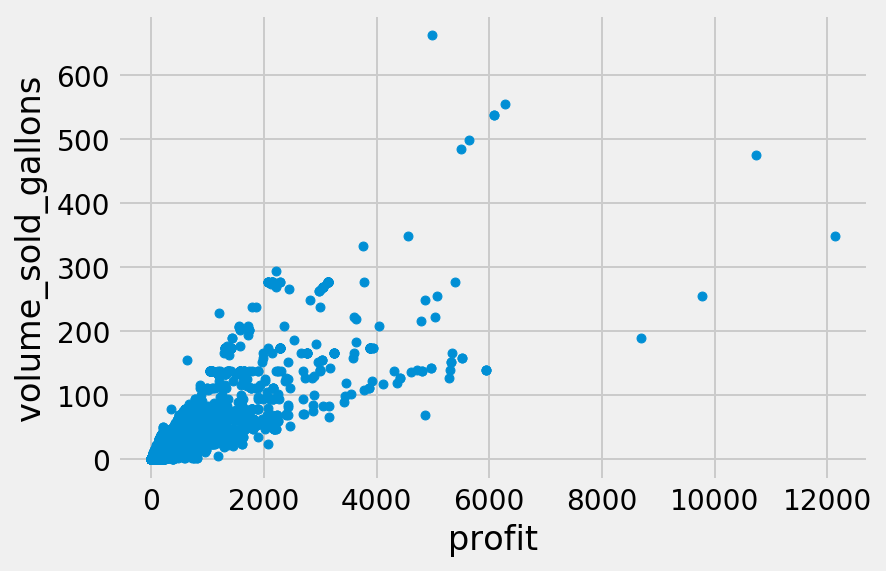

In [131]:
ax = plt.gca()
iowa.plot(kind='scatter',x='profit',y='volume_sold_gallons',ax=ax)
plt.show()
# Clearly, profit scales proportionally to store size.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [125]:
def label_liquor(row):
  if row['category_name'] == 'APRICOT BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'BLENDED WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'STRAIGHT BOURBON WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'AMERICAN COCKTAILS':
    return 'Liquor/Spirits'
  if row['category_name'] == 'VODKA 80 PROOF':
    return 'Vodka'
  if row['category_name'] == 'AMERICAN DRY GINS':
    return 'Gin'
  if row['category_name'] == 'AMERICAN GRAPE BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'CANADIAN WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'IMPORTED VODKA':
    return 'Imported Drinks'
  if row['category_name'] == 'CINNAMON SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'SINGLE BARREL BOURBON WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'PEPPERMINT SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'VODKA FLAVORED':
    return 'Vodka'
  if row['category_name'] == '100 PROOF VODKA':
    return 'Vodka'
  if row['category_name'] == 'DISTILLED SPIRITS SPECIALTY':
    return 'Liquor/Spirits'
  if row['category_name'] == 'TEQUILA':
    return 'Liquor/Spirits'
  if row['category_name'] == 'TENNESSEE WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'WHISKEY LIQUEUR':
    return 'Whisky'
  if row['category_name'] == 'MISC. AMERICAN CORDIALS & LIQUEURS':
    return 'Liquor/Spirits'
  if row['category_name'] == 'APPLE SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'CHERRY BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'MISC. IMPORTED CORDIALS & LIQUEURS':
    return 'Imported Drinks'
  if row['category_name'] == 'IMPORTED DRY GINS':
    return 'Imported Drinks'
  if row['category_name'] == 'WATERMELON SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'BLACKBERRY BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'SINGLE MALT SCOTCH':
    return 'Whisky'
  if row['category_name'] == 'PUERTO RICO & VIRGIN ISLANDS RUM':
    return 'Rum'
  if row['category_name'] == 'SPICED RUM':
    return 'Rum'
  if row['category_name'] == 'CREAM LIQUEURS':
    return 'Liquor/Spirits'
  if row['category_name'] == 'SCOTCH WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'IMPORTED VODKA - MISC':
    return 'Imported Drinks'
  if row['category_name'] == 'IRISH WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'FLAVORED RUM':
    return 'Rum'
  if row['category_name'] == 'IMPORTED GRAPE BRANDIES':
    return 'Imported Drinks'
  if row['category_name'] == 'SPEARMINT SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'RASPBERRY SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'AMERICAN AMARETTO':
    return 'Liquor/Spirits'
  if row['category_name'] == 'IMPORTED SCHNAPPS':
    return 'Imported Drinks'
  if row['category_name'] == 'STRAIGHT RYE WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'PEACH SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'MISCELLANEOUS  BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'STRAWBERRY SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'AMERICAN ALCOHOL':
    return 'Liquor/Spirits'
  if row['category_name'] == 'JAMAICA RUM':
    return 'Rum'
  if row['category_name'] == 'BARBADOS RUM':
    return 'Rum'
  if row['category_name'] == 'COFFEE LIQUEURS':
    return 'Liquor/Spirits'
  if row['category_name'] == 'ROOT BEER SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'DECANTERS & SPECIALTY PACKAGES':
    return 'Imported Drinks'
  if row['category_name'] == 'GRAPE SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'OTHER PROOF VODKA':
    return 'Vodka'
  if row['category_name'] == 'IMPORTED AMARETTO':
    return 'Imported Drinks'
  if row['category_name'] == 'BUTTERSCOTCH SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'ANISETTE':
    return 'Liquor/Spirits'
  if row['category_name'] == 'CREME DE ALMOND':
    return 'Liquor/Spirits'
  if row['category_name'] == 'ROCK & RYE':
    return 'Liquor/Spirits'
  if row['category_name'] == 'PEACH BRANDIES':
    return 'Brandy'
  if row['category_name'] == 'FLAVORED GINS':
    return 'Gin'
  if row['category_name'] == 'MISCELLANEOUS SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'WHITE CREME DE MENTHE':
    return 'Mint-flavored liqueurs (Creme de Menthe)'
  if row['category_name'] == 'WHITE CREME DE CACAO':
    return 'Mint-flavored liqueurs (Creme de Menthe)'
  if row['category_name'] == 'TROPICAL FRUIT SCHNAPPS':
    return 'Mint-flavored liqueurs (Schnapps)'
  if row['category_name'] == 'GREEN CREME DE MENTHE':
    return 'Mint-flavored liqueurs (Creme de Menthe)'
  if row['category_name'] == 'LOW PROOF VODKA':
    return 'Vodka'
  if row['category_name'] == 'AMERICAN SLOE GINS':
    return 'Gin'
  if row['category_name'] == 'DARK CREME DE CACAO':
    return 'Liquor/Spirits'
  if row['category_name'] == 'JAPANESE WHISKY':
    return 'Whisky'
  if row['category_name'] == 'BOTTLED IN BOND BOURBON':
    return 'Bourbon'
  if row['category_name'] == 'CORN WHISKIES':
    return 'Whisky'
  if row['category_name'] == 'HIGH PROOF BEER - AMERICAN':
    return 'Beer'
  if row['category_name'] == 'AMARETTO - IMPORTED':
    return 'Imported Drinks'

iowa['liquor_type'] = iowa.apply(lambda row: label_liquor(row), axis=1)

### 5.6 Do relationships exist between the broader liquor type and profit?

In [134]:
iowa.groupby('liquor_type')[['profit']].sum().sort_values('profit',ascending=False)

,profit
liquor_type,
Whisky,3.985676e+06
Imported Drinks,1.862429e+06
Vodka,1.714173e+06
Rum,1.441185e+06
Liquor/Spirits,1.272713e+06
Mint-flavored liqueurs (Schnapps),2.202053e+05
Brandy,2.000303e+05
Gin,1.423870e+05
Bourbon,6.750130e+03


In [135]:
iowa.groupby('liquor_type')[['profit']].mean().sort_values('profit',ascending=False)

,profit
liquor_type,
Imported Drinks,54.786986
Whisky,51.033642
Beer,47.590000
Rum,47.251959
Liquor/Spirits,39.685464
Bourbon,36.096952
Vodka,35.273225
Mint-flavored liqueurs (Schnapps),22.522786
Gin,22.024288



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [137]:
iowa.groupby(['vendor_number'])[['sale_dollars']].sum().sort_values('sale_dollars',ascending=False).head(10)

,sale_dollars
vendor_number,
260,7.114268e+06
65,2.623098e+06
370,2.470798e+06
85,2.132840e+06
434,2.112270e+06
115,2.102430e+06
421,2.053417e+06
35,1.705908e+06
55,1.227553e+06


In [138]:
iowa.groupby(['vendor_number'])[['profit']].sum().sort_values('profit',ascending=False).head(10)
# Vendor name was not in the data set but vendor number does basically the same thing
# There are clearly a few brands that make the most profit and sales

,profit
vendor_number,
260,2372065.92
65,877159.17
370,824049.85
115,713260.42
85,711121.74
434,704455.10
421,685358.35
35,570053.58
55,413572.14


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [128]:
iowa1 = iowa.groupby(['store_number','liquor_type'])[['profit']].sum().sort_values('profit', ascending=False)
iowa1.groupby(['liquor_type'])[['profit']].mean().sort_values('profit',ascending=False).reset_index()
# This gives us the profit per liquor type averaged over all the stores
# Taxing Whiskey, Imported Drinks and Vodka more heavily than the others would

,liquor_type,profit
0,Whisky,3810.398069
1,Imported Drinks,1829.497829
2,Vodka,1643.502311
3,Rum,1387.088306
4,Liquor/Spirits,1260.111703
5,Mint-flavored liqueurs (Schnapps),268.543024
6,Brandy,224.753146
7,Gin,174.922629
8,Bourbon,59.735664
9,Beer,47.590000
